## AutoClassifier가 어떤 분석이었는지...는 정확히 기억나지 않습니다만, 유형별로 요일을 나누어 분석했습니다.

#### 1. 모듈과 데이터를 불러옵니다.

In [1]:
from _element import feature_control as ft_c

In [2]:
from _usecase import algorithm_prophet as prpt
from _usecase._evaluation.compare import Cross_Validation

In [3]:
from _element import calculations as calc

In [4]:
import pandas as pd

In [5]:
from datetime import datetime

In [6]:
from _element import varr

In [7]:
INPUT_FILENAME= 'KPP일별투입(10_17)_withobject.xlsx'

In [8]:
df_raw= ft_c.xlsx_opener(varr.PJ_DIR+ '\\_element\\data\\private\\', INPUT_FILENAME)

In [9]:
df_raw

,ds,1041,1692,1815,1853,1878
0,2010-01-01,0,10,2652,0,0
1,2010-01-02,6260,3422,26443,459,626
2,2010-01-03,0,0,404,0,0
3,2010-01-04,5141,3641,22924,3445,3305
4,2010-01-05,5494,6552,39081,3861,4362
5,2010-01-06,10300,6924,41411,3353,6643
6,2010-01-07,11193,9513,42029,4317,3718
7,2010-01-08,12480,8382,45205,5338,6258
8,2010-01-09,4117,5148,31304,3463,3219
9,2010-01-10,0,0,336,0,0


In [10]:
df_temp= ft_c.xlsx_opener(varr.PJ_DIR+varr.TEMP_DATA_DIR, 'temp_data_merged.xlsx')

#### 2. 데이터를 전처리합니다.

In [11]:
y_col= df_raw.columns.values.tolist()

In [12]:
try:
    y_col.remove('ds')
except ValueError:
    pass

In [13]:
y_col

[1041, 1692, 1815, 1853, 1878]

In [14]:
x_col= df_temp.columns.values.tolist()

In [15]:
x_col

['ds', 'temp_max', 'temp_min', 'rain_amount']

In [16]:
df_raw['ds']= pd.to_datetime(df_raw['ds'], box=True, format= '%Y/%m/%d', exact=True)

In [17]:
df_temp['ds']= pd.to_datetime(df_temp['ds'], box=True, format= '%Y/%m/%d', exact=True)

In [18]:
df_raw= pd.merge(df_raw, df_temp, how='inner', on='ds')

In [19]:
df_raw.head()

,ds,1041,1692,1815,1853,1878,temp_max,temp_min,rain_amount
0,2010-07-01,5698,9534,44580,5328,4003,30.500000,24.900000,0.0
1,2010-07-02,2740,7910,44920,6644,5629,25.799999,22.700001,70.0
2,2010-07-03,2742,4176,26213,5111,2706,25.600000,22.600000,1.0
3,2010-07-04,0,0,299,746,0,29.700001,23.100000,0.0
4,2010-07-05,3451,4844,39234,5927,2700,30.600000,21.799999,0.0


#### 3. 평일과 토요일, 일요일로 나누어 prophet 알고리즘을 도입합니다.

In [20]:
df_weekday_weekdays= df_raw.loc[df_raw.ds.apply(lambda x: (x.weekday())>=0 and x.weekday()<=4)]
df_weekday_sat= df_raw.loc[df_raw.ds.apply(lambda x: x.weekday())==5]
df_weekday_sun= df_raw.loc[df_raw.ds.apply(lambda x: x.weekday())==6]

In [21]:
df_weekday= {}
for y in y_col:
    df_weekday[y]= {}
    df_weekday[y]['weekday']= ft_c.train_test_sample(df_weekday_weekdays, y, x_col, forecastday= 5)
    df_weekday[y]['sat']= ft_c.train_test_sample(df_weekday_sat, y, x_col, forecastday= 1)
    df_weekday[y]['sun']= ft_c.train_test_sample(df_weekday_sun, y, x_col, forecastday= 1)

In [22]:
# cv_5= Cross_Validation()

In [23]:
# cv_5.slice(df_raw, 'y', x_col)

In [24]:
# cv_5.cv_data

In [25]:
# cv_5.func_run(func= prpt.Bayseian2, extract_func= prpt.extract_info_from, output= 'sMAPE', unit= 'day')

In [26]:
result_dict= {}
for y in y_col:
    result_dict[y]= {
                    'weekday': prpt.Bayseian2(df_weekday[y]['weekday'], 'week'),\
                    'sat': prpt.Bayseian2(df_weekday[y]['sat'], 'week'),\
                    'sun': prpt.Bayseian2(df_weekday[y]['sun'], 'week'),\
                    }

In [27]:
merged_dict={}
for y in y_col:
    merged_dict[y]={'future': 
                    pd.concat([result_dict[y]['weekday']['future'],\
                              result_dict[y]['sat']['future'],\
                              result_dict[y]['sun']['future']],\
                              axis= 0).sort_values(by='ds', axis=0),
                   'forecastProphetTable':
                    pd.concat([result_dict[y]['weekday']['forecastProphetTable'],
                              result_dict[y]['sat']['forecastProphetTable'],\
                              result_dict[y]['sun']['forecastProphetTable']],\
                              axis= 0).sort_values(by='ds', axis=0)
                   }

In [28]:
forecast_dict={}
print(INPUT_FILENAME)
for y in y_col:
    merged_dict[y]['future']['ds']= pd.to_datetime(merged_dict[y]['future']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    merged_dict[y]['forecastProphetTable']['ds']= pd.to_datetime(merged_dict[y]['forecastProphetTable']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    forecast_dict[y]= prpt.extract_info_from(merged_dict[y]['future'], merged_dict[y]['forecastProphetTable'], varr.FORECASTDAY)
    forecast_dict[y]['result_df']= pd.merge(forecast_dict[y]['result_df'], df_raw[['ds', y]], how='inner', on='ds')
    print('RMSE with segment '+str(y)+': '+str(calc.rms_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE with segment '+str(y)+': '+str(calc.map_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_with_std with segment '+str(y)+': '+str(calc.map_error_with_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_div_std with segment '+str(y)+': '+str(calc.map_error_div_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('sMAPE of company code '+str(y)+': '+str(calc.smap_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print(forecast_dict[y]['result_df'].head())
    ft_c.save_as_xlsx(varr.PJ_DIR+varr.DF_DIR, forecast_dict[y]['result_df'], INPUT_FILENAME, '_seg'+str(y)+'withweekday')
    print('\n')

KPP일별투입(10_17)_withobject.xlsx
RMSE with segment 1041: 1320.15434898
MAPE with segment 1041: inf
MAPE_with_std with segment 1041: 34.2996915189
MAPE_div_std with segment 1041: 76.9476550587
sMAPE of company code 1041: 17.4897973382
          ds  temp_max  temp_min  rain_amount         yhat  1041
0 2017-11-24       2.9      -2.5          0.1  5758.179048  8733
1 2017-11-25       6.4       0.8         15.7  5003.659823  5100
2 2017-11-26       6.4      -2.4          0.0    -8.574297     0
3 2017-11-27       8.1       1.8          0.0  5767.317771  4866
4 2017-11-28       9.8       4.2          1.2  5790.148622  5723


RMSE with segment 1692: 787.27631504
MAPE with segment 1692: inf
MAPE_with_std with segment 1692: 17.1263380001
MAPE_div_std with segment 1692: 94.1190962346
sMAPE of company code 1692: 4.23311274467
          ds  temp_max  temp_min  rain_amount          yhat   1692
0 2017-11-24       2.9      -2.5          0.1  18075.369488  18452
1 2017-11-25       6.4       0.8         1

C:\Nextop\nextop-engine\nextop_engine\_element\calculations.py:13: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



RMSE with segment 1815: 4657.25145483
MAPE with segment 1815: 8.56020142032
MAPE_with_std with segment 1815: 19.7531537959
MAPE_div_std with segment 1815: 78.0930378691
sMAPE of company code 1815: 5.50772726451
          ds  temp_max  temp_min  rain_amount          yhat   1815
0 2017-11-24       2.9      -2.5          0.1  78006.629687  70495
1 2017-11-25       6.4       0.8         15.7  39223.756856  43952
2 2017-11-26       6.4      -2.4          0.0    123.029024    100
3 2017-11-27       8.1       1.8          0.0  77679.408085  75686
4 2017-11-28       9.8       4.2          1.2  77562.440318  77009


RMSE with segment 1853: 885.919942648
MAPE with segment 1853: inf
MAPE_with_std with segment 1853: 38.4030605576
MAPE_div_std with segment 1853: 90.9696737507
sMAPE of company code 1853: 15.3334549705
          ds  temp_max  temp_min  rain_amount         yhat  1853
0 2017-11-24       2.9      -2.5          0.1  5016.544484  5928
1 2017-11-25       6.4       0.8         15.7  1786.1

#### 분석 결과를 그래프로 나타냅니다.

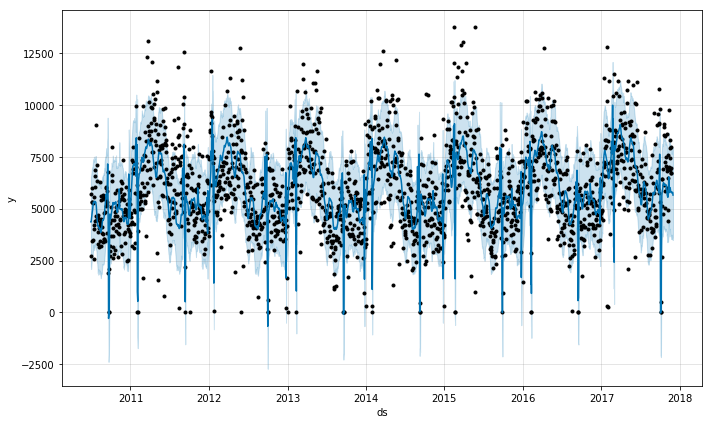

In [29]:
result_dict[1041]['weekday']['model'].plot(result_dict[1041]['weekday']['forecastProphetTable'])

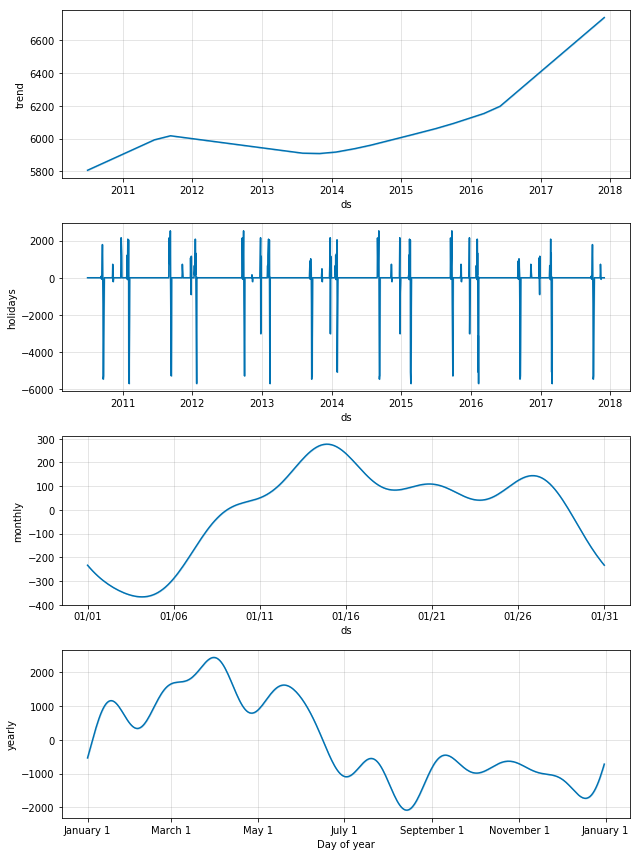

In [30]:
result_dict[1041]['weekday']['model'].plot_components(result_dict[1041]['weekday']['forecastProphetTable'])

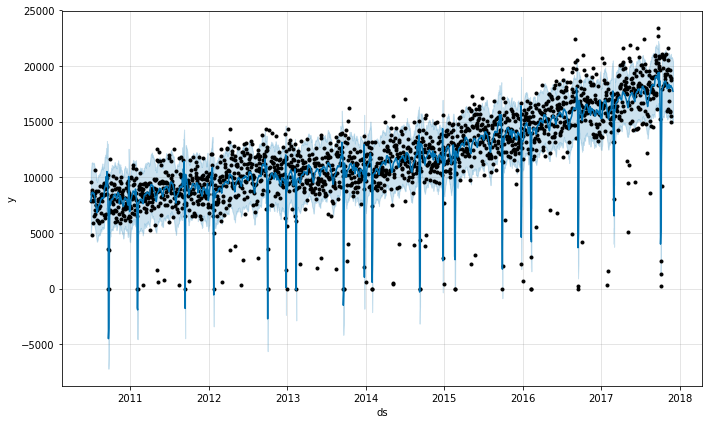

In [31]:
result_dict[1692]['weekday']['model'].plot(result_dict[1692]['weekday']['forecastProphetTable'])

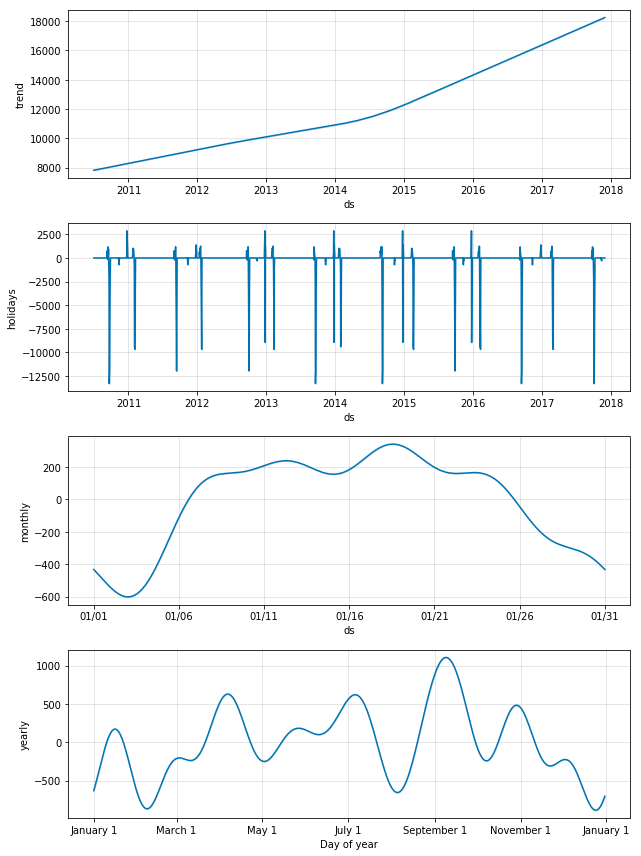

In [32]:
result_dict[1692]['weekday']['model'].plot_components(result_dict[1692]['weekday']['forecastProphetTable'])

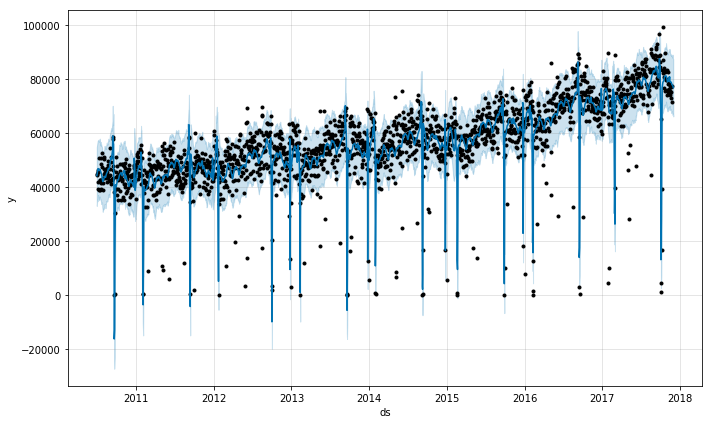

In [33]:
result_dict[1815]['weekday']['model'].plot(result_dict[1815]['weekday']['forecastProphetTable'])

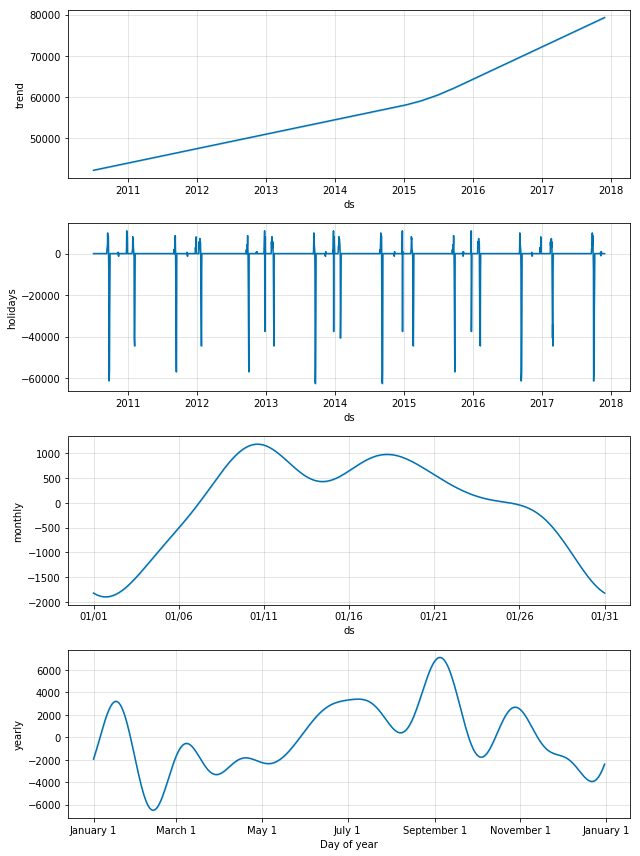

In [34]:
result_dict[1815]['weekday']['model'].plot_components(result_dict[1815]['weekday']['forecastProphetTable'])

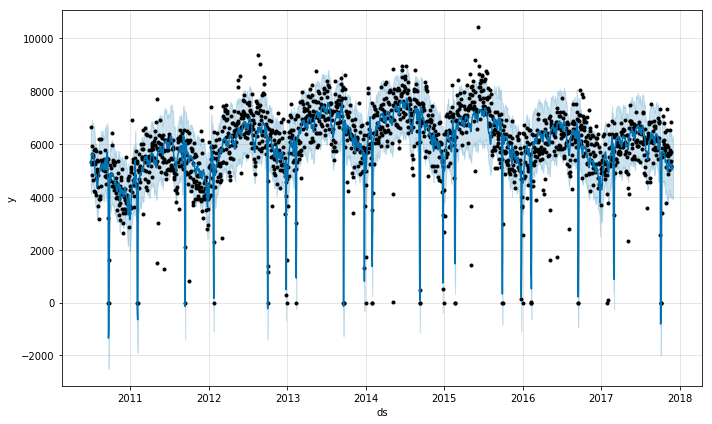

In [35]:
result_dict[1853]['weekday']['model'].plot(result_dict[1853]['weekday']['forecastProphetTable'])

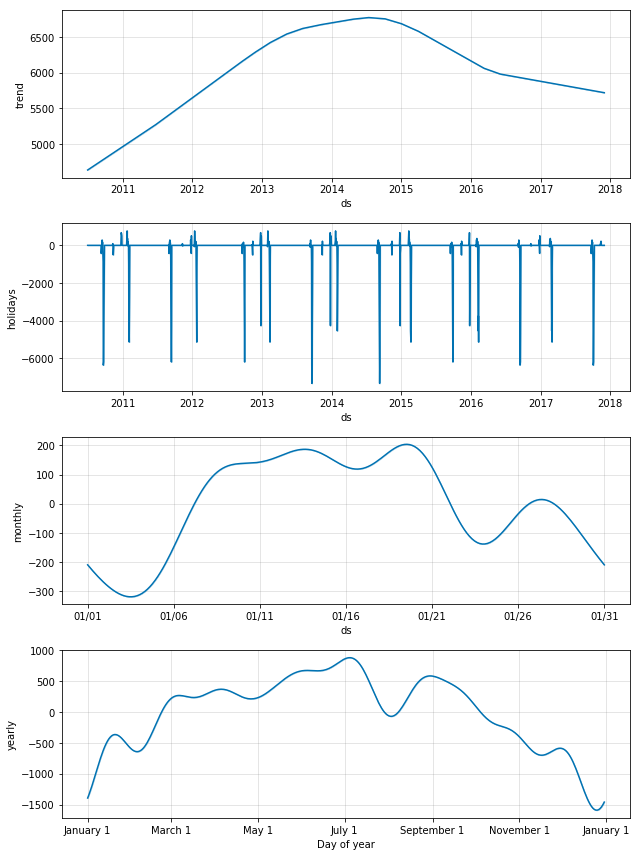

In [36]:
result_dict[1853]['weekday']['model'].plot_components(result_dict[1853]['weekday']['forecastProphetTable'])

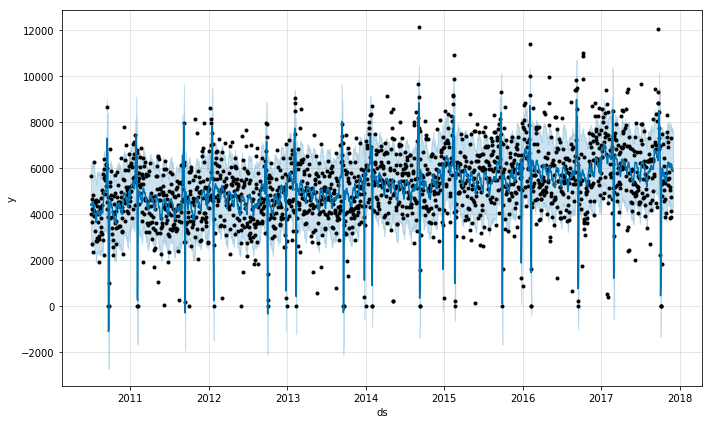

In [37]:
result_dict[1878]['weekday']['model'].plot(result_dict[1878]['weekday']['forecastProphetTable'])

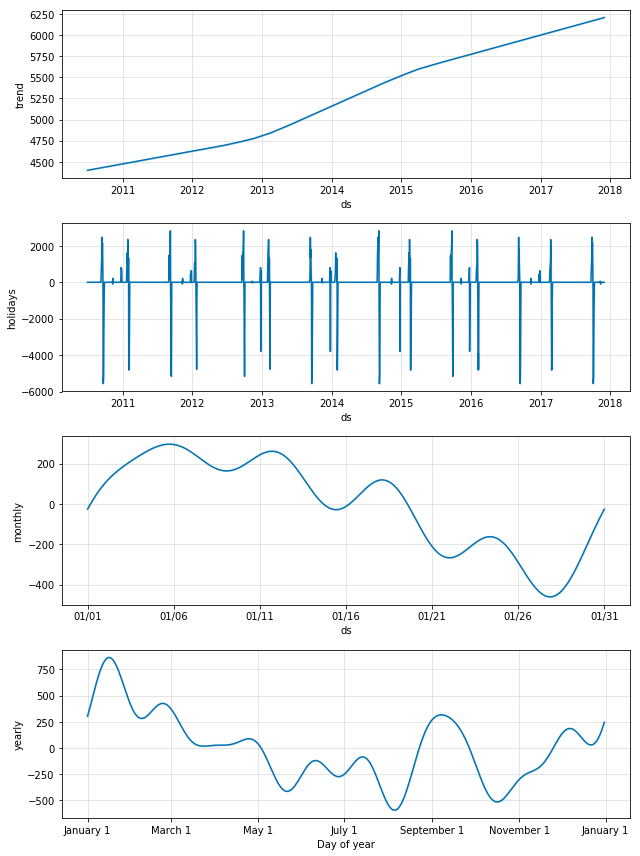

In [38]:
result_dict[1878]['weekday']['model'].plot_components(result_dict[1878]['weekday']['forecastProphetTable'])

#### 4. 동일한 과정을 모든 요일을 따로 나누어 시행해 보았습니다.

* 그 결과는 위보다 좋지 않은 것으로 나왔습니다.

In [39]:
df_weekday= {}
split_point= 7
for i in range(split_point):
    df_splited= df_raw.loc[df_raw.ds.apply(lambda x: x.weekday())==i]
    df_weekday[i]= {}
    for y in y_col:
        df_weekday[i][y]= ft_c.train_test_sample(
            df_splited, y, x_col, forecastday= varr.FORECASTDAY//split_point)

In [40]:
result_dict= {}
for y in y_col:
    result_dict[y]= {
                    'mon': prpt.Bayseian2(df_weekday[0][y], 'week'),\
                    'tue': prpt.Bayseian2(df_weekday[1][y], 'week'),\
                    'wed': prpt.Bayseian2(df_weekday[2][y], 'week'),\
                    'thu': prpt.Bayseian2(df_weekday[3][y], 'week'),\
                    'pri': prpt.Bayseian2(df_weekday[4][y], 'week'),\
                    'sat': prpt.Bayseian2(df_weekday[5][y], 'week'),\
                    'sun': prpt.Bayseian2(df_weekday[6][y], 'week'),\
                    }

In [41]:
merged_dict={}
for y in y_col:
    merged_dict[y]={'future': 
                    pd.concat([result_dict[y]['mon']['future'],\
                              result_dict[y]['tue']['future'],\
                              result_dict[y]['wed']['future'],\
                              result_dict[y]['thu']['future'],\
                              result_dict[y]['pri']['future'],\
                              result_dict[y]['sat']['future'],\
                              result_dict[y]['sun']['future']],\
                              axis= 0).sort_values(by='ds', axis=0),
                   'forecastProphetTable':
                    pd.concat([result_dict[y]['mon']['forecastProphetTable'],\
                              result_dict[y]['tue']['forecastProphetTable'],\
                              result_dict[y]['wed']['forecastProphetTable'],\
                              result_dict[y]['thu']['forecastProphetTable'],\
                              result_dict[y]['pri']['forecastProphetTable'],\
                              result_dict[y]['sat']['forecastProphetTable'],\
                              result_dict[y]['sun']['forecastProphetTable']],\
                              axis= 0).sort_values(by='ds', axis=0)
                   }

In [42]:
forecast_dict={}
print(INPUT_FILENAME)
for y in y_col:
    merged_dict[y]['future']['ds']= pd.to_datetime(merged_dict[y]['future']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    merged_dict[y]['forecastProphetTable']['ds']= pd.to_datetime(merged_dict[y]['forecastProphetTable']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    forecast_dict[y]= prpt.extract_info_from(merged_dict[y]['future'], merged_dict[y]['forecastProphetTable'], varr.FORECASTDAY)
    forecast_dict[y]['result_df']= pd.merge(forecast_dict[y]['result_df'], df_raw[['ds', y]], how='inner', on='ds')
    print('RMSE with segment '+str(y)+': '+str(calc.rms_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE with segment '+str(y)+': '+str(calc.map_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_with_std with segment '+str(y)+': '+str(calc.map_error_with_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_div_std with segment '+str(y)+': '+str(calc.map_error_div_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('sMAPE of company code '+str(y)+': '+str(calc.smap_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print(forecast_dict[y]['result_df'].head())
    ft_c.save_as_xlsx(varr.PJ_DIR+varr.DF_DIR, forecast_dict[y]['result_df'], INPUT_FILENAME, '_seg'+str(y)+'withweekday')
    print('\n')

KPP일별투입(10_17)_withobject.xlsx
RMSE with segment 1041: 1152.4944897
MAPE with segment 1041: inf
MAPE_with_std with segment 1041: 34.3838023696
MAPE_div_std with segment 1041: 100.295430906
sMAPE of company code 1041: 16.5939702212
          ds  temp_max  temp_min  rain_amount         yhat  1041
0 2017-11-24       2.9      -2.5          0.1  6508.437868  8733
1 2017-11-25       6.4       0.8         15.7  5003.659823  5100
2 2017-11-26       6.4      -2.4          0.0    -8.574297     0
3 2017-11-27       8.1       1.8          0.0  5008.485916  4866
4 2017-11-28       9.8       4.2          1.2  5169.631197  5723


RMSE with segment 1692: 1304.02815034
MAPE with segment 1692: inf
MAPE_with_std with segment 1692: 19.1650995625
MAPE_div_std with segment 1692: 90.7929020632
sMAPE of company code 1692: 8.14650504044
          ds  temp_max  temp_min  rain_amount          yhat   1692
0 2017-11-24       2.9      -2.5          0.1  17878.998060  18452
1 2017-11-25       6.4       0.8         1

C:\Nextop\nextop-engine\nextop_engine\_element\calculations.py:13: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100




RMSE with segment 1853: 909.475177944
MAPE with segment 1853: inf
MAPE_with_std with segment 1853: 39.0270028749
MAPE_div_std with segment 1853: 83.7886023985
sMAPE of company code 1853: 14.2079728349
          ds  temp_max  temp_min  rain_amount         yhat  1853
0 2017-11-24       2.9      -2.5          0.1  5121.375594  5928
1 2017-11-25       6.4       0.8         15.7  1786.181829  1885
2 2017-11-26       6.4      -2.4          0.0  -249.229440     0
3 2017-11-27       8.1       1.8          0.0  5348.200008  5417
4 2017-11-28       9.8       4.2          1.2  5020.894482  7159


RMSE with segment 1878: 1102.6465542
MAPE with segment 1878: inf
MAPE_with_std with segment 1878: 31.4400368066
MAPE_div_std with segment 1878: 71.2102309766
sMAPE of company code 1878: 16.3801918556
          ds  temp_max  temp_min  rain_amount         yhat  1878
0 2017-11-24       2.9      -2.5          0.1  7182.999516  7409
1 2017-11-25       6.4       0.8         15.7  2713.942897  2604
2 2017-11-

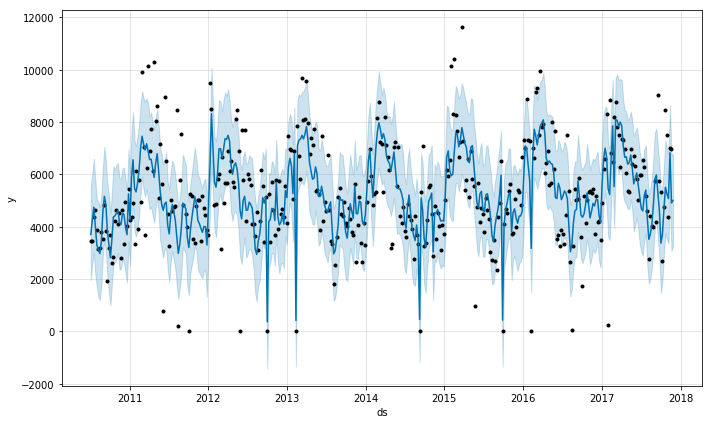

In [43]:
result_dict[1041]['mon']['model'].plot(result_dict[1041]['mon']['forecastProphetTable'])

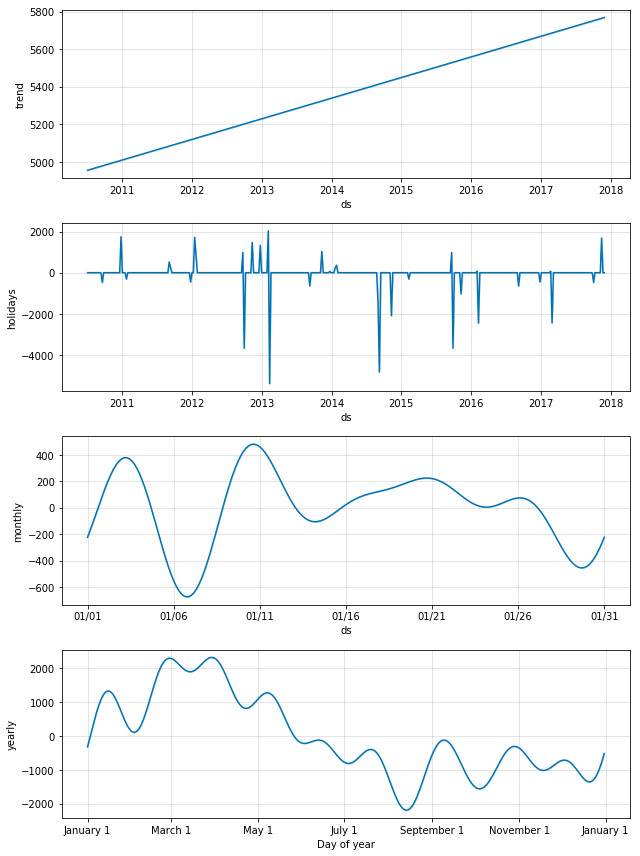

In [44]:
result_dict[1041]['mon']['model'].plot_components(result_dict[1041]['mon']['forecastProphetTable'])

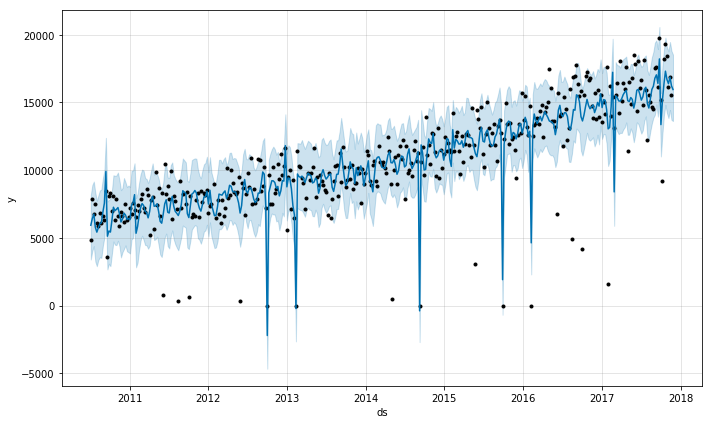

In [45]:
result_dict[1692]['mon']['model'].plot(result_dict[1692]['mon']['forecastProphetTable'])

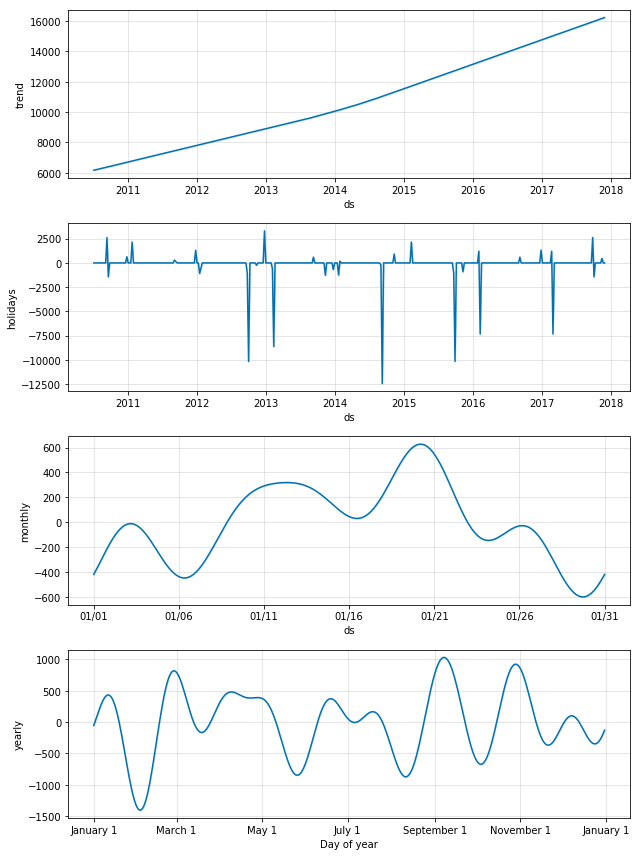

In [46]:
result_dict[1692]['mon']['model'].plot_components(result_dict[1692]['mon']['forecastProphetTable'])

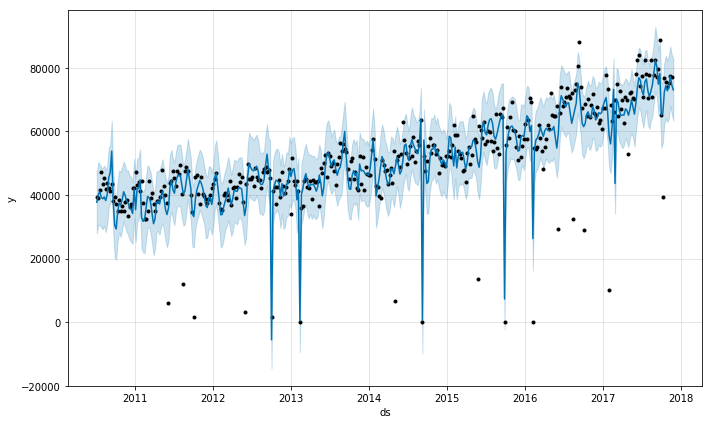

In [47]:
result_dict[1815]['mon']['model'].plot(result_dict[1815]['mon']['forecastProphetTable'])

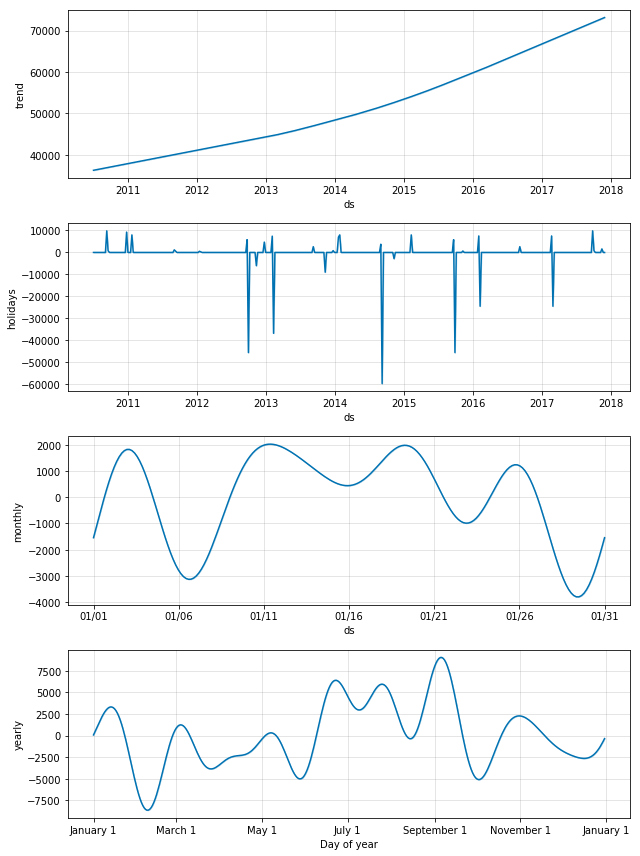

In [48]:
result_dict[1815]['mon']['model'].plot_components(result_dict[1815]['mon']['forecastProphetTable'])

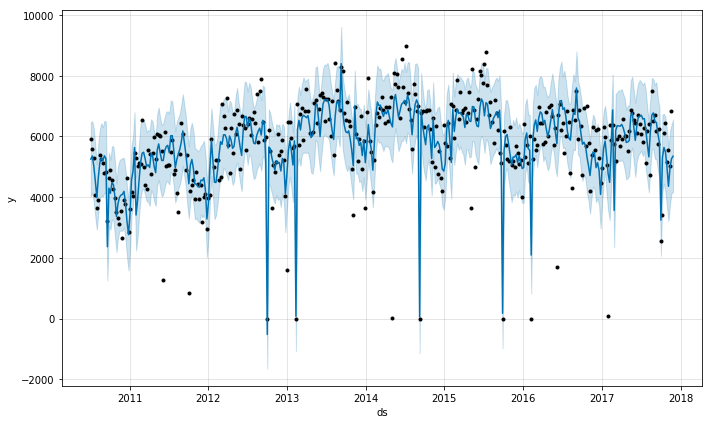

In [49]:
result_dict[1853]['mon']['model'].plot(result_dict[1853]['mon']['forecastProphetTable'])

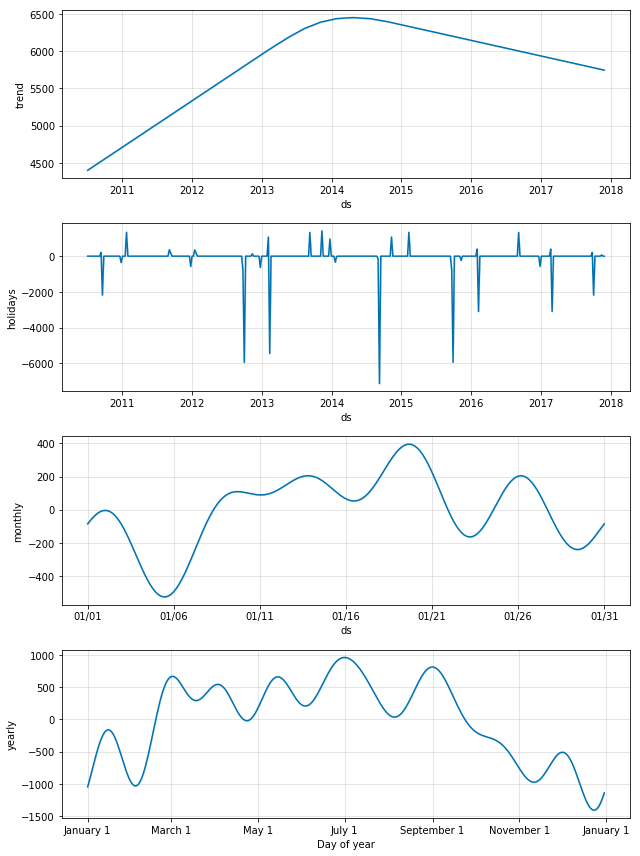

In [50]:
result_dict[1853]['mon']['model'].plot_components(result_dict[1853]['mon']['forecastProphetTable'])

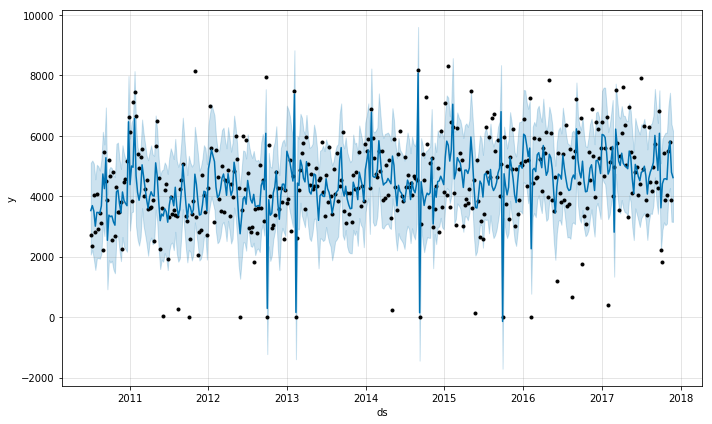

In [51]:
result_dict[1878]['mon']['model'].plot(result_dict[1878]['mon']['forecastProphetTable'])

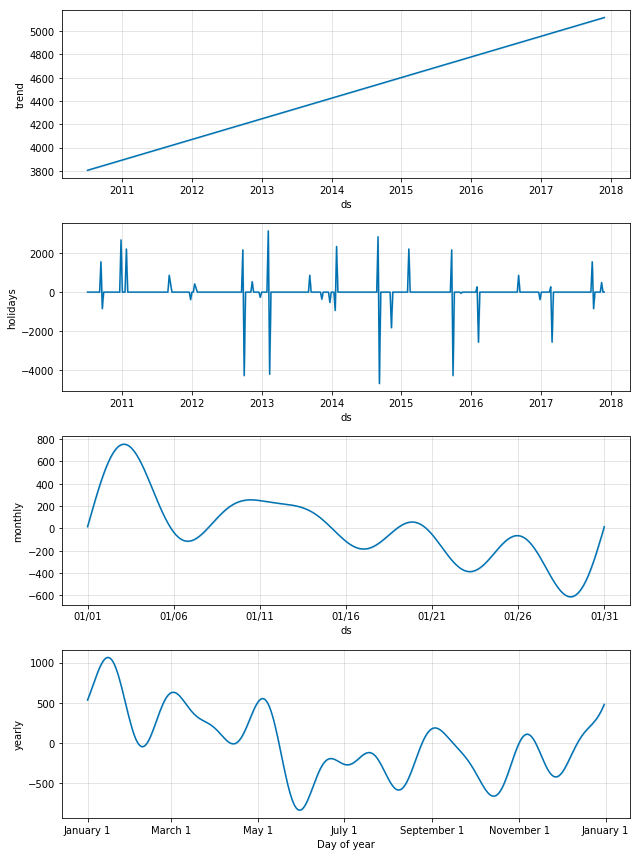

In [52]:
result_dict[1878]['mon']['model'].plot_components(result_dict[1878]['mon']['forecastProphetTable'])

In [53]:
result_dict= {}
for y in y_col:
    traintest_dict= ft_c.train_test_sample(df_raw, y, x_col, forecastday= 7)
    result_dict[y]= prpt.Bayseian2(traintest_dict, 'day')

In [54]:
forecast_dict= {}
print(INPUT_FILENAME)
for y in y_col:
    result_dict[y]['future']['ds']= pd.to_datetime(result_dict[y]['future']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    result_dict[y]['forecastProphetTable']['ds']= pd.to_datetime(result_dict[y]['forecastProphetTable']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    forecast_dict[y]= prpt.extract_info_from(result_dict[y]['future'], result_dict[y]['forecastProphetTable'], varr.FORECASTDAY)
    forecast_dict[y]['result_df']= pd.merge(forecast_dict[y]['result_df'], df_raw[['ds', y]], how='inner', on='ds')
    print('RMSE with segment '+str(y)+': '+str(calc.rms_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE with segment '+str(y)+': '+str(calc.map_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_with_std with segment '+str(y)+': '+str(calc.map_error_with_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_div_std with segment '+str(y)+': '+str(calc.map_error_div_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('sMAPE of company code '+str(y)+': '+str(calc.smap_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print(forecast_dict[y]['result_df'].head())
    ft_c.save_as_xlsx(varr.PJ_DIR+varr.DF_DIR, forecast_dict[y]['result_df'], INPUT_FILENAME, '_seg'+str(y)+'withoutweekday')
    print('\n')

KPP일별투입(10_17)_withobject.xlsx
RMSE with segment 1041: 992.772478196
MAPE with segment 1041: inf
MAPE_with_std with segment 1041: 36.1882949539
MAPE_div_std with segment 1041: 97.0643606974
sMAPE of company code 1041: 14.109996639
          ds  temp_max  temp_min  rain_amount         yhat  1041
0 2017-11-24       2.9      -2.5          0.1  6711.939603  8733
1 2017-11-25       6.4       0.8         15.7  5135.157306  5100
2 2017-11-26       6.4      -2.4          0.0  -273.734225     0
3 2017-11-27       8.1       1.8          0.0  5047.149500  4866
4 2017-11-28       9.8       4.2          1.2  5461.340151  5723


RMSE with segment 1692: 2395.81057257
MAPE with segment 1692: inf
MAPE_with_std with segment 1692: 27.3564319996
MAPE_div_std with segment 1692: 77.93943939
sMAPE of company code 1692: 13.0533890492
          ds  temp_max  temp_min  rain_amount          yhat   1692
0 2017-11-24       2.9      -2.5          0.1  17131.162824  18452
1 2017-11-25       6.4       0.8         15.

C:\Nextop\nextop-engine\nextop_engine\_element\calculations.py:13: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100




RMSE with segment 1815: 7589.60528188
MAPE with segment 1815: 2357.6708442
MAPE_with_std with segment 1815: 25.9135272421
MAPE_div_std with segment 1815: 82.7778285385
sMAPE of company code 1815: 9.9851055386
          ds  temp_max  temp_min  rain_amount          yhat   1815
0 2017-11-24       2.9      -2.5          0.1  75010.425488  70495
1 2017-11-25       6.4       0.8         15.7  47912.593726  43952
2 2017-11-26       6.4      -2.4          0.0  16565.291424    100
3 2017-11-27       8.1       1.8          0.0  67416.923410  75686
4 2017-11-28       9.8       4.2          1.2  74964.401145  77009


RMSE with segment 1853: 1266.28387559
MAPE with segment 1853: inf
MAPE_with_std with segment 1853: 51.5933517544
MAPE_div_std with segment 1853: 97.9872069169
sMAPE of company code 1853: 26.4658716575
          ds  temp_max  temp_min  rain_amount         yhat  1853
0 2017-11-24       2.9      -2.5          0.1  5115.496362  5928
1 2017-11-25       6.4       0.8         15.7  3519.76